수정일: 2025.03.08

#HW2: 2차원 변환

이번 과제에서는 다양한 2차원 변환 문제를 풀어보자.

우선 필요한 모듈을 불러오고, 필요한 셋팅을 한다.

In [ ]:
import numpy as np # 행렬 계산을 위해 Numpy를 불러온다.
import matplotlib.pyplot as plt # 그래프 출력을 위해 Matplotlib를 불러온다.

## 이동 변환(translation)
동차 좌표계(homogeneous coordinate system)에서 이동 변환은 다음과 같은 행렬로 표현된다.

$$
T(t_x, t_y) = \begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
$$

이를 파이썬 함수로 다음과 같이 표현할 수 있다.

참고: 행렬은 NumPy의 [array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) 함수를 이용한다.

In [ ]:
def translate(tx, ty):
  return np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]]) # Numpy의 array 함수를 이용해 행렬을 생성한다.

함수 **translate**를 이용하면, $x-$축과 $y-$축 방향으로 $(2, 3)$ 만큼 이동시키는 변환을 다음과 같이 만들 수 있다.

In [ ]:
T1 = translate(2, 3)
print(T1)

이를 이용해 점 $p(1, 1)$을 이동시켜보자.

참고: 행렬곱은 NumPy의 [dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) 함수를 이용한다.

In [ ]:
p = np.array([1, 1, 1]) # 동차 좌표계세서 점 (1, 1)은 (1, 1, 1)로 표현한다.
p2 = T1.dot(p) # Numpy에서 행렬 곱은 dot 함수를 이용해 계산한다.

print("동차 좌표계에서: ", p2) # (3, 4, 1)이 출력된다. 이는 직교 좌표계에서 (3, 4)를 의미한다.

# 직교 좌표계의 좌표로 계산하기 위해서는 마지막 좌표로 나머지 좌표를 나누면 된다. 즉, (x/w, y/w)
print("직교 좌표계에서: ", p2[:2] / p2[2]) # (3, 4)가 출력된다.

## 확대/축소 변환(scaling)

원점에 대한 확대/축소 변환 행렬은 다음과 같이 표현된다.


$$
S(s_x, s_y) = \begin{bmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

**지시: 원점에 대한 확대/축소 변환 행렬을 만드는 아래의 함수 scale을 완성하시오.**

In [ ]:
def scale(sx, sy):
  ## 원점에 대한 확대/축소 변환 행렬을 나타내기 위해, 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  return np.identity(3)
  #### 코드 종료 ####

이를 이용해 점 $p(1, 1)$을 원점에 대해 2배 확대시킨 위치를 계산해보자.

In [ ]:
S1 = scale(2, 2)

p = np.array([1, 1, 1]) # 동차 좌표계세서 점 (1, 1)은 (1, 1, 1)로 표현한다.
p3 = S1.dot(p) # Numpy에서 행렬 곱은 dot 함수를 이용해 계산한다.

assert abs(p3[0] - 2) < 0.0001
assert abs(p3[1] - 2) < 0.0001
assert abs(p3[2] - 1) < 0.0001

print("성공!!!")
print("동차 좌표계에서: ", p3)
print("직교 좌표계에서: ", p3[:2] / p3[2])

## 회전 변환(rotation)

원점에 대한 회전 변환 행렬은 다음과 같이 표현된다.


$$
R(\theta) = \begin{bmatrix}
cos(\theta) & -sin(\theta) & 0 \\
sin(\theta) & cos(\theta) & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

**지시: 원점에 대한 회전 변환 행렬을 만드는 아래의 함수 rotate를 완성하시오.**

In [ ]:
def rotate(theta): # theta는 도(degree)로 가정한다.
  radian = np.deg2rad(theta) # 도(degree)를 라디안(radian)으로 변환한다.

  ## 원점에 대한 회전 변환 행렬을 나타내기 위해, 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  return np.identity(3)
  #### 코드 종료 ####

이를 이용해 점 $p(1, 1)$을 원점에 대해 반시계 방향으로 40도 회전시킨 위치를 계산해보자.

In [ ]:
R1 = rotate(40)

p = np.array([1, 1, 1]) # 동차 좌표계세서 점 (1, 1)은 (1, 1, 1)로 표현한다.
p4 = R1.dot(p) # Numpy에서 행렬 곱은 dot 함수를 이용해 계산한다.

assert abs(p4[0] - 0.1233) < 0.0001
assert abs(p4[1] - 1.4088) < 0.0001
assert abs(p4[2] - 1) < 0.0001

print("성공!!!")
print("동차 좌표계에서: ", p4)
print("직교 좌표계에서: ", p4[:2] / p4[2])

## 합성 변환

기본 변환들을 조합해 다양한 변환을 만들 수 있다. 이를 이용해 원점이 아닌 점 $(x_1, y_1)$에 대한 회전 변환을 만들어보자. 이를 그림으로 표현하면 다음과 같다.

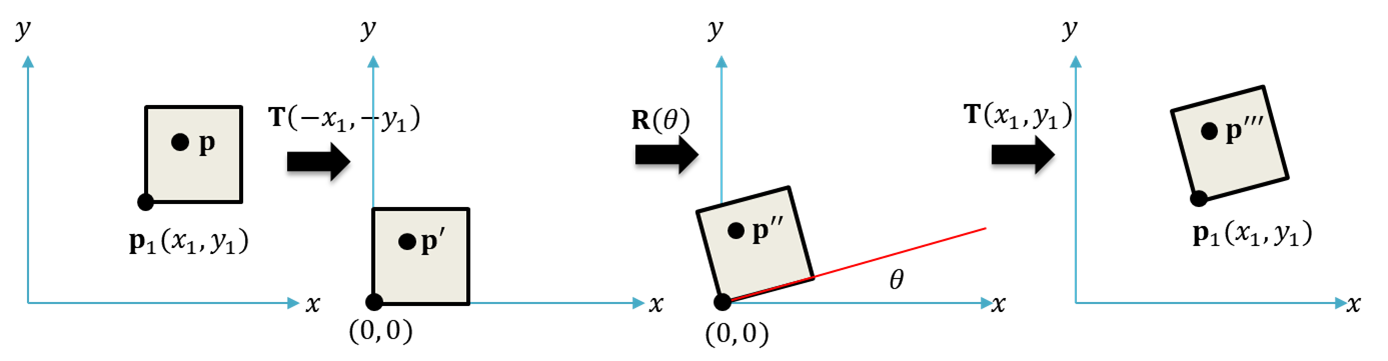

위의 그림을 참고하여 점 $(x_1, y_1)$에 대한 회전 변환을 만들어보자.

**지시: 점 $(x_1, y_1)$에 대한 회전 변환 행렬을 만드는 아래의 함수 rotate_at을 완성하시오. 단, 앞에서 만든 translate와 rotate 함수를 활용하시오.**

In [ ]:
def rotate_at(x1, y1, theta): # theta는 도(degree)로 가정한다.
  ## (x1, y1)에 대한 회전 변환 행렬을 나타내기 위해, 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  return np.identity(3)
  #### 코드 종료 ####

위에서 만든 함수 **rotate_at**이 잘 작동하는지 테스트해 보자.

In [ ]:
R2 = rotate_at(1, 1, 40)

p5 = np.array([1, 1, 1])
p6 = np.array((2, 2, 1))

p7 = R2.dot(p5)
p8 = R2.dot(p6)

assert abs(p7[0] - 1) < 0.0001
assert abs(p7[1] - 1) < 0.0001
assert abs(p7[2] - 1) < 0.0001

assert abs(p8[0] - 1.1233) < 0.0001
assert abs(p8[1] - 2.4088) < 0.0001
assert abs(p8[2] - 1) < 0.0001

print("성공!!!")
print("동차 좌표계에서: ", p7)
print("동차 좌표계에서: ", p8)

## 여러 점의 변환

변환 행렬을 이용하면 여러 점을 한 번에 변환하는 것도 가능하다. 또한, 다각형을 변환시킬 때에도 다각형의 꼭지점을 한 번에 변환하면 된다.

네 개의 점 $(1, 1)$, $(2, 1)$, $(2, 3)$, $(1, 3)$을 점 $(3, 2)$에 대해 반시계 방향으로 30도 회전시켜 보자.

네 점을 다음과 같이 한 개의 행렬로 표현할 수 있다.

$$
P = \begin{bmatrix}
1 & 2 & 2 & 1 \\
1 & 1 & 3 & 3 \\
1 & 1 & 1 & 1
\end{bmatrix}
$$

이를 파이썬 코드로 표현하면 다음과 같다.

In [ ]:
P = np.array([[1, 2, 2, 1], [1, 1, 3, 3], [1, 1, 1, 1]])

**지시: 함수 rotate_at과 행렬 P를 이용해, 네 점을 점 (3, 2)에 대해 반시계 방향으로 30도 회전시킨 위치를 계산하시오.**

In [ ]:
#### 코드 시작 ####
P2 = rotate_at(3, 2, 30).dot(P)
#### 코드 종료 ####

아래 코드를 실행하여 결과를 확인한다.

In [ ]:
assert abs(P2[0][0] - 1.7679) < 0.0001
assert abs(P2[1][0] - 0.1340) < 0.0001
assert abs(P2[2][0] - 1) < 0.0001
assert abs(P2[0][1] - 2.6340) < 0.0001
assert abs(P2[1][1] - 0.6340) < 0.0001
assert abs(P2[2][1] - 1) < 0.0001
assert abs(P2[0][2] - 1.6340) < 0.0001
assert abs(P2[1][2] - 2.3660) < 0.0001
assert abs(P2[2][2] - 1) < 0.0001
assert abs(P2[0][3] - 0.7679) < 0.0001
assert abs(P2[1][3] - 1.8660) < 0.0001
assert abs(P2[2][3] - 1) < 0.0001

print("성공!!!")
print(P2)

변환을 눈으로 확인하기 위해 Matplotlib의 기능을 이용해보자.

In [ ]:
x = P[0] # 원본 점의 x-좌표들
y = P[1] # 원본 점의 y-좌표들
x2 = P2[0] # 변환 후 점의 x-좌표들
y2 = P2[1] # 변환 후 점의 y-좌표들

# matplotlib를 이용해 점들을 그리기
fig, ax = plt.subplots() # 한 개의 Axes를 포함하는 Figure를 생성한다.
ax.plot(x, y, '.', x2, y2, '.') # 그래프를 그린다.
ax.plot([3], [2], 'x') # 회전 중심
ax.set(xlim=(-1, 5), ylim=(-1, 5)) # 가로축과 세로축의 범위
ax.set_aspect('equal') # 그래프가 정사각형으로 그려진다.
plt.show()  # 그래프를 나타나게 하기 위해선 plt.show()함수를 호출해야만 한다. Colab에서는 호출하지 않아도 그려진다.

이번 과제는 여기까지 입니다. 수고하셨습니다.